In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import pandas as pd
from nltk.corpus import stopwords
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("dataset/"))

['imdb_master.csv', 'labeledTrainData.tsv', 'sampleSubmission.csv', 'testData.tsv', 'unlabeledTrainData.tsv']


In [2]:
df_train = pd.read_csv("dataset/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
df_train1=pd.read_csv("dataset/imdb_master.csv",encoding="latin-1")
df_train1.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
df_train1=df_train1.drop(["type",'file'],axis=1)

In [6]:
df_train1.rename(columns={'label':'sentiment', 'Unnamed: 0':'id', 'review':'review'}, inplace=True)

In [7]:
df_train1 = df_train1[df_train1.sentiment != 'unsup']

In [8]:
maping = {'pos': 1, 'neg': 0}
df_train1['sentiment'] = df_train1['sentiment'].map(maping)

In [9]:
new_train=pd.concat([df_train,df_train1])

In [10]:
df_test=pd.read_csv("dataset/testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [11]:
new_train.head()

,id,review,sentiment
0,"""5814_8""","""With all this stuff going down at the moment ...",1
1,"""2381_9""","""\""The Classic War of the Worlds\"" by Timothy ...",1
2,"""7759_3""","""The film starts with a manager (Nicholas Bell...",0
3,"""3630_4""","""It must be assumed that those who praised thi...",0
4,"""9495_8""","""Superbly trashy and wondrously unpretentious ...",1


In [12]:
from bs4 import BeautifulSoup
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

new_train['review']=new_train['review'].apply(review_to_words)
df_test["review"]=df_test["review"].apply(review_to_words)

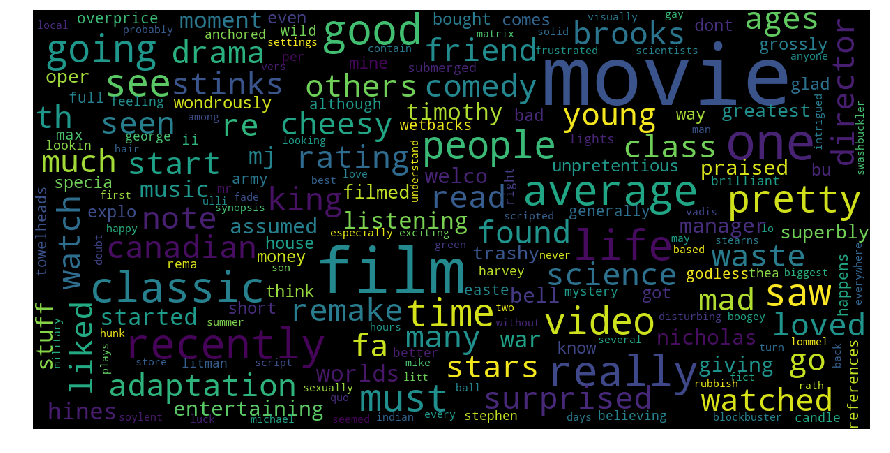

In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_train["review"])

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
list_classes = ["sentiment"]
y = new_train[list_classes].values
list_sentences_train = new_train["review"]
list_sentences_test = df_test["review"]